# Relatorio final - clique [aqui](https://docs.google.com/document/d/1_T8htjOOUTR57XOAA6lVSncZ1pWfqveY/edit)

# Common 

In [ ]:
#Pacotes
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#Importação dos dados
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Abrindo o arquivo
with open("/gdrive/My Drive/RML2016.10a_dict.pkl", 'rb') as f:
    loaded = pickle.load(f, encoding="latin1")

In [ ]:
# # Estudos preliminares, o arquivo loaded é um dicionario com dois indices de chaves, sendo o primeiro
# # dos indices a modulação e o segundo deles a signal to noise ratio*/

# # print(loaded.keys())

# #Cada uma das modulacoes e snr temm 1000 dados, cada um desses dados  é um array 2 x 128,
# # sendo 128 a dimensão temporal e 2 , dois canais  o I e o Q(não sei em qual ordem.)
# numero_dados_df=pd.DataFrame(columns=['Mod','Snr','Numero Segmentos'])
# linha=-1
# for key in loaded.keys():
#     linha+=1
#     numero_dados_df.loc[linha,'Mod']=key[0]
#     numero_dados_df.loc[linha,'Snr']=key[1]
#     numero_dados_df.loc[linha,'Numero Segmentos']=loaded[key].shape[0]
# print(loaded[('QPSK',2)].shape[0])
# print("Numero de dados por mod e snr:")
# print(numero_dados_df.head())
# print("Numero de dados por mod:")
# print(numero_dados_df.groupby(['Mod'])['Numero Segmentos'].sum())
# print("Numero de snr por mod:")
# print(numero_dados_df.groupby(['Mod'])['Snr'].count())

In [ ]:
# Organizando os dados
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], loaded.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(loaded[(mod,snr)])
        for i in range(loaded[(mod,snr)].shape[0]):  lbl.append((mod,snr))
#         print(type(loaded[[(mod,snr)]]))
#         print(type(loaded[(mod,snr)]))
#         print((np.array(loaded[(mod,snr)])).shape)
# print(len(X))                
X = np.vstack(X)
print("Formato dos dados:")
print(X.shape)
# print(len(lbl))
print("Modulações existentes:")
print(mods)
print(len(mods))
print("Snrs existentes:")
print(snrs)
print(len(snrs))

Formato dos dados:
(220000, 2, 128)
Modulações existentes:
['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
11
Snrs existentes:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
20


In [ ]:
#As amostras consistem de 11 modulações cada uma com 20 nsr e e cada snr com 1000 segmentos de dados 2x128(dois canais i e qb)

Exemplo dado


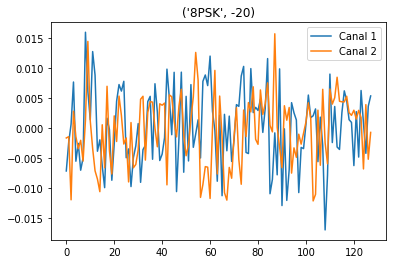

In [ ]:
print("Exemplo dado")
plt.figure()
plt.title(lbl[0])
plt.plot(X[0,0], label='Canal 1')
plt.plot(X[0,1], label='Canal 2')
plt.legend()

In [ ]:

def hot_encoding (lbl,mods):
    #Essa função pega a lbl que contem os dados de modulação e snr e transforma em um array de 1 e 0.
    #Sendo que a coluna onde houver 1 é a modulação ou a snr
    y_mod=np.zeros(shape=(len(lbl),len(mods)))
    y_snr=np.zeros(shape=(len(lbl),len(snrs)))
    linha=-1
    for dado in lbl:
        linha+=1
        coluna=-1
        for mod in mods:
            if lbl[linha][0]==mod:
                y_mod[linha,mods.index(mod)]=1
                break
        for snr in snrs:
            if lbl[linha][1]==snr:
                y_snr[linha,snrs.index(snr)]=1
                break
    return y_mod, y_snr

#Fazendo hot encoding(transformar em 1 e 0) as modulações e os snr.
y_mod, y_snr=hot_encoding(lbl,mods)

# # Conferindo o one hote encoding de mod e snr
# import random
# print("Verificando o hot enconding:")
# print(mods)
# print(snrs)
# i=random.randint(0,len(lbl))
# print(lbl[i])
# print(y_mod[i])
# print(y_snr[i])

# #Verificando se os dados estão normalizados em relação aos atributos
# # print(np.mean(X,axis=0).shape)
# # print(np.amax(np.mean(X,axis=0)))
# # print(np.amin(np.mean(X,axis=0)))
# # print(np.std(X,axis=0).shape)
# # print(np.amax(np.std(X,axis=0)))
# # print(np.amin(np.std(X,axis=0)))

# #Verificando se os dados estão normalizados em relação a dimensão espacial
# print(X.shape)
# print(np.mean(X,axis=2).shape)
# print(np.amax(np.mean(X,axis=2)))
# print(np.amin(np.mean(X,axis=2)))
# print(np.std(X,axis=2).shape)
# print(np.amax(np.std(X,axis=2)))
# print(np.amin(np.std(X,axis=2)))

#Verificamos que os dados apezar de estarem com média ok não estão com 1 desvio padrão em relação aos atributos, logo vamos normalizar:
X_n=(X-np.mean(X,axis=0))/(np.std(X,axis=0))
print(np.mean(X_n,axis=0).shape)
print(np.amax(np.mean(X_n,axis=0)))
print(np.amin(np.mean(X_n,axis=0)))
print(np.std(X_n,axis=0).shape)
print(np.amax(np.std(X_n,axis=0)))
print(np.amin(np.std(X_n,axis=0)))

#Juntando os dados de modulações e ruidos pra dar split.
y=np.concatenate((y_mod,y_snr),axis=1)
#Separando em treino e teste
x_train, x_test, y_train, y_test = train_test_split(
X_n, y, test_size=0.30, random_state=42)
#Verificando o formato dos dados
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Separando o treino e teste em modulações e snr
#Contem as modulações do conjunto de treinamento
y_train_mod=y_train[:,0:11]
#Contém os snrs do conjunto de treinamento
y_train_snr=y_train[:,11:32]
#Contém as modulaç~eos do conjunto de teste.
y_test_mod=y_test[:,0:11]
#Contém os snrs do conjunto de teste
y_test_snr=y_test[:,11:32]
print(y_test_mod.shape)
print(y_test_snr.shape)

(2, 128)
2.1597305e-06
-1.5059162e-06
(2, 128)
1.0000136
0.99998695
(154000, 2, 128)
(154000, 31)
(66000, 2, 128)
(66000, 31)
(66000, 11)
(66000, 20)


#**Roger's implementation**

In [ ]:
#Pacotes
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import Convolution1D
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import MaxPooling1D
from keras.layers import ZeroPadding2D
from keras.layers import Activation
from keras.layers import Input
from keras.layers import Concatenate
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.models import Model
from keras.utils import plot_model
from keras.backend import clear_session
import time
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


Using TensorFlow backend.


Train on 154000 samples, validate on 66000 samples
Epoch 1/200
154000/154000 [==============================] - 1s 9us/step - loss: 2.3188 - acc: 0.1928 - val_loss: 1.8806 - val_acc: 0.2968
Epoch 2/200
154000/154000 [==============================] - 1s 7us/step - loss: 2.0292 - acc: 0.2551 - val_loss: 1.8066 - val_acc: 0.3371
Epoch 3/200
154000/154000 [==============================] - 1s 8us/step - loss: 1.9661 - acc: 0.2712 - val_loss: 1.7911 - val_acc: 0.3436
Epoch 4/200
154000/154000 [==============================] - 1s 8us/step - loss: 1.9398 - acc: 0.2803 - val_loss: 1.7779 - val_acc: 0.3463
Epoch 5/200
154000/154000 [==============================] - 1s 7us/step - loss: 1.9270 - acc: 0.2857 - val_loss: 1.7681 - val_acc: 0.3437
Epoch 6/200
154000/154000 [==============================] - 1s 7us/step - loss: 1.9172 - acc: 0.2902 - val_loss: 1.7624 - val_acc: 0.3400
Epoch 7/200
154000/154000 [==============================] - 1s 7us/step - loss: 1.9109 - acc: 0.2919 - val_loss: 1

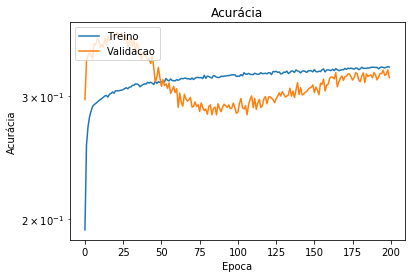

Acurácia maxima de validação:
0.37095454380367743


In [ ]:
# MLP
epocas=200
drop=0.6
clear_session()
rede_neural = Sequential()
rede_neural.add(Dropout(drop))
rede_neural.add(Flatten())
rede_neural.add(Dense(2048, activation='relu'))
rede_neural.add(Dropout(drop))
rede_neural.add(Dense( 11, activation='softmax' ))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('mlp.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('mlp.h5')

# with open('/gdrive/My Drive/teste3.pkl', 'wb') as file_pi:
#     pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_accuracy(historico)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

Train on 154000 samples, validate on 66000 samples
Epoch 1/200
154000/154000 [==============================] - 1s 9us/step - loss: 2.9088 - acc: 0.1381 - val_loss: 2.1184 - val_acc: 0.2184
Epoch 2/200
154000/154000 [==============================] - 1s 8us/step - loss: 2.2894 - acc: 0.1623 - val_loss: 2.0836 - val_acc: 0.2264
Epoch 3/200
154000/154000 [==============================] - 1s 8us/step - loss: 2.2312 - acc: 0.1798 - val_loss: 2.0213 - val_acc: 0.2632
Epoch 4/200
154000/154000 [==============================] - 1s 8us/step - loss: 2.1996 - acc: 0.1936 - val_loss: 1.9666 - val_acc: 0.2911
Epoch 5/200
154000/154000 [==============================] - 1s 8us/step - loss: 2.1726 - acc: 0.2043 - val_loss: 1.9328 - val_acc: 0.3003
Epoch 6/200
154000/154000 [==============================] - 1s 8us/step - loss: 2.1561 - acc: 0.2116 - val_loss: 1.9162 - val_acc: 0.2986
Epoch 7/200
154000/154000 [==============================] - 1s 8us/step - loss: 2.1433 - acc: 0.2169 - val_loss: 1

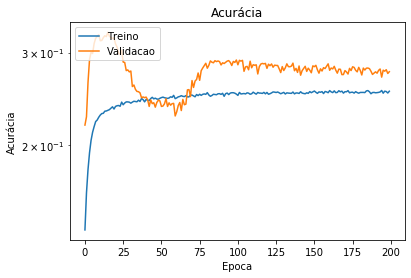

Acurácia maxima de validação:
0.3278030310616349


In [ ]:
# MLP
epocas=200
drop=0.8
clear_session()
rede_neural = Sequential()
rede_neural.add(Dropout(drop))
rede_neural.add(Flatten())
rede_neural.add(Dense(2048, activation='relu'))
rede_neural.add(Dropout(drop))
rede_neural.add(Dense( 11, activation='softmax' ))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('mlp.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('mlp.h5')

# with open('/gdrive/My Drive/teste3.pkl', 'wb') as file_pi:
#     pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_accuracy(historico)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

In [ ]:
# #Uma primeira rede de teste bem idiota e que não funciona
# rede_neural=Sequential()
# rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
# rede_neural.add(Convolution2D(30,(3,3),strides=(1,1), activation='relu',padding='same',input_shape=(2,128,1)))
# rede_neural.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
# rede_neural.add(Flatten())
# rede_neural.add(Dense(100, activation='relu'))
# rede_neural.add(Dense(11, activation='sigmoid'))
# rede_neural.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])
# rede_neural.summary()

#Largando de ser teimoso e usando convolução 1d:

# rede_neural=Sequential()
# rede_neural.add(Convolution1D(64,3,strides=1, activation='relu',padding='same',input_shape=(2,128)))
# # rede_neural.add(MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_first'))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Convolution1D(16,3,strides=1, activation='relu',padding='same',input_shape=(2,64)))
# # rede_neural.add(MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_first'))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Flatten())
# rede_neural.add(Dense(128, activation='relu'))
# # rede_neural.add(Dense(100, activation='relu'))
# rede_neural.add(Dense(11, activation='softmax'))
# rede_neural.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])
# rede_neural.summary()

# #A rede do gabarito
# rede_neural = Sequential()
# rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
# rede_neural.add(ZeroPadding2D((0, 2)))
# rede_neural.add(Convolution2D(256, 1, 3, border_mode='valid', activation="relu", name="conv1", init='glorot_uniform'))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(ZeroPadding2D((0, 2)))
# rede_neural.add(Convolution2D(80, 2, 3, border_mode="valid", activation="relu", name="conv2", init='glorot_uniform'))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Flatten())
# rede_neural.add(Dense(256, activation='relu', init='he_normal', name="dense1"))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Dense( 11, init='he_normal', name="dense2" ))
# rede_neural.add(Activation('softmax'))
# # rede_neural.add(Reshape([11]))
# rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
# rede_neural.summary()

# #Ao infinito e além
# rede_neural=Sequential()
# rede_neural.add(Convolution1D(256,3,strides=1, activation='relu',padding='same',input_shape=(2,128)))
# # rede_neural.add(MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_first'))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Convolution1D(80,3,strides=1, activation='relu',padding='same',input_shape=(2,64)))
# # rede_neural.add(MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_first'))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Flatten())
# rede_neural.add(Dense(256, activation='relu'))
# # rede_neural.add(Dense(100, activation='relu'))
# rede_neural.add(Dense(11, activation='softmax'))
# rede_neural.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])
# rede_neural.summary()


#Teste 1 Rede do gabarito escrita do meu jeito
# rede_neural = Sequential()
# rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
# rede_neural.add(Convolution2D(256, 3,strides=1, padding='same', activation="relu"))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Convolution2D(80, 3, strides=2, padding='same', activation="relu"))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Flatten())
# rede_neural.add(Dense(256, activation='relu'))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Dense( 11, activation='softmax' ))
# # rede_neural.add(Reshape([11]))
# rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
# rede_neural.summary()
#+-54% de acurácia

#Teste 2 Rede do artigo 1
# rede_neural = Sequential()
# rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
# rede_neural.add(Convolution2D(64, (1,3),strides=1, padding='same', activation="relu"))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Convolution2D(16, (2,3), strides=1, padding='same', activation="relu"))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Flatten())
# rede_neural.add(Dense(128, activation='relu'))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Dense( 11, activation='softmax' ))
# # rede_neural.add(Reshape([11]))
# rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
# rede_neural.summary()
#+-54% de acurácia

# Teste3 aumentando os neurônios da camada densa
# rede_neural = Sequential()
# rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
# rede_neural.add(Convolution2D(64, (1,3),strides=1, padding='same', activation="relu"))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Convolution2D(16, (2,3), strides=1, padding='same', activation="relu"))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Flatten())
# rede_neural.add(Dense(256, activation='relu'))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Dense( 11, activation='softmax' ))
# # rede_neural.add(Reshape([11]))
# rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
# rede_neural.summary()
#+-54% de acurácia não mudou muito

#Teste 4 aumentando o número de kernels e neuronios
# rede_neural = Sequential()
# rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
# rede_neural.add(Convolution2D(128, (1,3),strides=1, padding='same', activation="relu"))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Convolution2D(32, (2,3), strides=1, padding='same', activation="relu"))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Flatten())
# rede_neural.add(Dense(256, activation='relu'))
# rede_neural.add(Dropout(0.5))
# rede_neural.add(Dense( 11, activation='softmax' ))
# # rede_neural.add(Reshape([11]))
# rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
# rede_neural.summary()
# plot_model(rede_neural, show_layer_names=False, show_shapes=True)
# #+-54% de accuracy com overfitting

# # #Teste 5 outro jeito de programar com convoluções em paralelo
# inputs=Input(shape=(2,128))
# layer1=Reshape((2,128,1))(inputs)
# layer2_1=Convolution2D(64, (1,3),strides=1, padding='same', activation="relu")(layer1)
# layer2_2=Convolution2D(64, (1,6),strides=1, padding='same', activation="relu")(layer1)
# layer2_3=Convolution2D(64, (1,12),strides=1, padding='same', activation="relu")(layer1)
# layer2=Concatenate(axis=3)([layer2_1,layer2_2,layer2_3])
# layer3=Flatten()(layer2)
# layer4=Dropout(0.5)(layer3)
# layer5=Dense(128, activation='relu')(layer4)
# outputs=Dense(11, activation='softmax')(layer5)
# rede_neural=Model(inputs, outputs)
# rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
# plot_model(rede_neural,show_shapes=True, show_layer_names=False)
# # +-46% acurácia

# Teste 6 MLP
rede_neural = Sequential()
rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
rede_neural.add(Flatten())
rede_neural.add(Dropout(0.5))
rede_neural.add(Dense(2048, activation='relu'))
rede_neural.add(Dropout(0.5))
rede_neural.add(Dense( 11, activation='softmax' ))
# rede_neural.add(Reshape([11]))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()
plot_model(rede_neural, show_layer_names=False, show_shapes=True)

In [ ]:
#Problemas encontrados:
# 1 - Utilizar a categorical cross entropy.
# 2 - Utilizar 11 saidas com sigmoid da erro de nan tivemos que mudar para softamx.

In [ ]:
def to_number(y_test):
    #Convertendo os dados de [0,1,0,...0]-->[2]
    #Transforma one hot encoding para labels numericas
    y_test_l=np.zeros(66000)
    for i in range(0,y_test.shape[0]):
        # print(np.where(y_test[i,:] == np.amax(y_test[i,:]))[0]+1)
        y_test_l[i]=np.where(y_test[i,:] == np.amax(y_test[i,:]))[0]+1
    return y_test_l

# #Checando se esta funcionando:
# import random
# i= random.randint(0, y_test_mod.shape[0])
# print("Numero:")
# print(i)
# print("Array classe verdadeira:")
# print(y_test_mod[i,:])
# print("Classe verdadeira:")
# print(y_test_mod_ln[i])
# print("Array classe prevista:")
# print(y_test_mod_p[i,:])
# print("Classe prevista:")
# print(y_test_mod_p_ln[i])

#Grafico do erro por modulação e snr.
def relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln):  
  accuracy=np.zeros((len(mods),len(snrs)))
  for snr in snrs:
    for mod in mods:
      #Pega os indices das colunas correpondentes ao snr e ao mod.
      index_snr=snrs.index(snr)
      # print(index_snr)
      index_mod=mods.index(mod)
      # print(index_mod)
      #Retorna o array do y_test_mod com essa modulação e esse snr
      array_mod_snr=np.where((y_test_mod[:,index_mod]==1)*(y_test_snr[:,index_snr]==1))
      #Pega os valores das classes verdadeiras e das previstas para esse indice.
      y_teste_mod_snr_ln=y_test_mod_ln[array_mod_snr]
      y_teste_mod_snr_ln_p=y_test_mod_p_ln[array_mod_snr]
      # print("Real")
      # print(y_teste_mod_snr_ln)
      # print("Previsto")
      # print(y_teste_mod_snr_ln_p)
      # print(mod)
      # print(snr)
      # print(confusion_matrix(y_teste_mod_snr_ln,y_teste_mod_snr_ln_p,labels=[1,2,3,4,5,6,7,8,9,10,11])*100/(y_teste_mod_snr_ln.shape))
      accuracy[index_mod,index_snr]= accuracy_score(y_teste_mod_snr_ln,y_teste_mod_snr_ln_p)
      # print(accuracy_score(y_teste_mod_snr_ln,y_teste_mod_snr_ln_p))
    # print(np.round(accuracy,2))

  for i in range(0,11):
    plt.plot(snrs, accuracy[i,:])
    plt.plot(snrs, accuracy[i,:])
  plt.xlabel("Snr")
  plt.ylabel("Classification Accuracy")

def mostra_grafico_custo(historico):
    plt.plot(historico.history['loss'])
    plt.plot(historico.history['val_loss'])
    plt.title('Custo')
    plt.ylabel('Custo')
    plt.xlabel('Epoca')
    plt.yscale("log")
    plt.legend(['Treino', 'Validacao'], loc='upper left')
    plt.show()
def mostra_grafico_accuracy(historico):
    plt.plot(historico.history['acc'])
    plt.plot(historico.history['val_acc'])
    plt.title('Acurácia')
    plt.ylabel('Acurácia')
    plt.xlabel('Epoca')
    plt.yscale("log")
    plt.legend(['Treino', 'Validacao'], loc='upper left')
    plt.show()
#Grafico do erro por snr plotar
def relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln):  
  accuracy=np.zeros(len(snrs))
  for snr in snrs:
      #Pega os indices das colunas correpondentes ao snr e ao mod.
      index_snr=snrs.index(snr)
      # print(index_snr)
      #Retorna o array do y_test_mod com essa modulação e esse snr
      array_snr=np.where(y_test_snr[:,index_snr]==1)
      #Pega os valores das classes verdadeiras e das previstas para esse indice.
      y_teste_snr_ln=y_test_mod_ln[array_snr]
      y_teste_snr_ln_p=y_test_mod_p_ln[array_snr]
      # print("Real")
      # print(y_teste_mod_snr_ln)
      # print("Previsto")
      # print(y_teste_mod_snr_ln_p)
      # print(mod)
      # print(snr)
      # print(confusion_matrix(y_teste_mod_snr_ln,y_teste_mod_snr_ln_p,labels=[1,2,3,4,5,6,7,8,9,10,11])*100/(y_teste_mod_snr_ln.shape))
      accuracy[index_snr]= accuracy_score(y_teste_snr_ln,y_teste_snr_ln_p)
      # print(accuracy_score(y_teste_mod_snr_ln,y_teste_mod_snr_ln_p))
    # print(np.round(accuracy,2))
  print(np.round(accuracy*100,3))
  print(snrs)
  plt.plot(snrs, accuracy)
  plt.plot(snrs, accuracy)
  plt.xlabel("Snr")
  plt.ylabel("Classification Accuracy")

# def relatorio_classificacao3(snrs,y_test_mod_ln,y_test_mod_p_ln,nomearquivo):  
#   accuracy=np.zeros(len(snrs))
#   for snr in snrs:
#       #Pega os indices das colunas correpondentes ao snr e ao mod.
#       index_snr=snrs.index(snr)
#       # print(index_snr)
#       #Retorna o array do y_test_mod com essa modulação e esse snr
#       array_snr=np.where(y_test_snr[:,index_snr]==1)
#       #Pega os valores das classes verdadeiras e das previstas para esse indice.
#       y_teste_snr_ln=y_test_mod_ln[array_snr]
#       y_teste_snr_ln_p=y_test_mod_p_ln[array_snr]
#       # print("Real")
#       # print(y_teste_mod_snr_ln)
#       # print("Previsto")
#       # print(y_teste_mod_snr_ln_p)
#       # print(mod)
#       # print(snr)
#       # print(confusion_matrix(y_teste_mod_snr_ln,y_teste_mod_snr_ln_p,labels=[1,2,3,4,5,6,7,8,9,10,11])*100/(y_teste_mod_snr_ln.shape))
#       accuracy[index_snr]= accuracy_score(y_teste_snr_ln,y_teste_snr_ln_p)
#       # print(accuracy_score(y_teste_mod_snr_ln,y_teste_mod_snr_ln_p))
#     # print(np.round(accuracy,2))
#   print(np.round(accuracy,2))
#   print(snrs)
#   plt.plot(snrs, accuracy)
#   plt.plot(snrs, accuracy)
#   plt.xlabel("Snr")
#   plt.ylabel("Classification Accuracy")

In [ ]:
#Teste 1, implementação da CNN2 do artigo com dropout de 0.6:
epocas=200
clear_session()
rede_neural = Sequential()
rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
rede_neural.add(Convolution2D(256, (1,3),strides=1, padding='same', activation="relu"))
rede_neural.add(Dropout(0.6))
rede_neural.add(Convolution2D(80, (2,3), strides=1, padding='same', activation="relu"))
rede_neural.add(Dropout(0.6))
rede_neural.add(Flatten())
rede_neural.add(Dense(256, activation='relu'))
rede_neural.add(Dropout(0.6))
rede_neural.add(Dense( 11, activation='softmax' ))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('/gdrive/My Drive/teste1.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('/gdrive/My Drive/teste1.h5')

with open('/gdrive/My Drive/teste1.pkl', 'wb') as file_pi:
    pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)

#Prevendo os dados de teste com a rede
y_test_mod_p=rede_neural.predict(x_test)

#Convertendo as classificações para números
y_test_mod_ln=to_number(y_test_mod)
y_test_mod_p_ln=to_number(y_test_mod_p)


# Matrix de confusão
print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
# relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln)
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 128, 256)       1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 128, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 128, 80)        122960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 128, 80)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

KeyboardInterrupt: ignored

In [ ]:
#Teste 2, implementação da CNN2 do artigo com dropout de 0:
epocas=200
clear_session()
rede_neural = Sequential()
rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
rede_neural.add(Convolution2D(256, (1,3),strides=1, padding='same', activation="relu"))
rede_neural.add(Convolution2D(80, (2,3), strides=1, padding='same', activation="relu"))
rede_neural.add(Flatten())
rede_neural.add(Dense(256, activation='relu'))
rede_neural.add(Dense( 11, activation='softmax' ))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('/gdrive/My Drive/teste2.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('/gdrive/My Drive/teste2.h5')

with open('/gdrive/My Drive/teste2.pkl', 'wb') as file_pi:
    pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)

#Prevendo os dados de teste com a rede
y_test_mod_p=rede_neural.predict(x_test)

#Convertendo as classificações para números
y_test_mod_ln=to_number(y_test_mod)
y_test_mod_p_ln=to_number(y_test_mod_p)


# Matrix de confusão
print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
# relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln)
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

In [ ]:
#Teste 3, implementação da CNN do artigo com dropout de 0.5:
epocas=200
clear_session()
rede_neural = Sequential()
rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
rede_neural.add(Convolution2D(64, (1,3),strides=1, padding='same', activation="relu"))
rede_neural.add(Dropout(0.5))
rede_neural.add(Convolution2D(16, (2,3), strides=1, padding='same', activation="relu"))
rede_neural.add(Dropout(0.5))
rede_neural.add(Flatten())
rede_neural.add(Dense(128, activation='relu'))
rede_neural.add(Dropout(0.5))
rede_neural.add(Dense( 11, activation='softmax' ))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('/gdrive/My Drive/teste3.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('/gdrive/My Drive/teste3.h5')

with open('/gdrive/My Drive/teste3.pkl', 'wb') as file_pi:
    pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)

#Prevendo os dados de teste com a rede
y_test_mod_p=rede_neural.predict(x_test)

#Convertendo as classificações para números
y_test_mod_ln=to_number(y_test_mod)
y_test_mod_p_ln=to_number(y_test_mod_p)


# Matrix de confusão
print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
# relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln)
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 128, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 128, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 128, 16)        6160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 128, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

KeyboardInterrupt: ignored

In [ ]:
#Teste 3, implementação da CNN do artigo sem dropout 0.5:
epocas=200
clear_session()
rede_neural = Sequential()
rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
rede_neural.add(Convolution2D(64, (1,3),strides=1, padding='same', activation="relu"))
rede_neural.add(Dropout(0.5))
rede_neural.add(Convolution2D(16, (2,3), strides=1, padding='same', activation="relu"))
rede_neural.add(Dropout(0.5))
rede_neural.add(Flatten())
rede_neural.add(Dense(128, activation='relu'))
rede_neural.add(Dropout(0.5))
rede_neural.add(Dense( 11, activation='softmax' ))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('/gdrive/My Drive/teste3.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('/gdrive/My Drive/teste3.h5')

with open('/gdrive/My Drive/teste3.pkl', 'wb') as file_pi:
    pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)

#Prevendo os dados de teste com a rede
y_test_mod_p=rede_neural.predict(x_test)

#Convertendo as classificações para números
y_test_mod_ln=to_number(y_test_mod)
y_test_mod_p_ln=to_number(y_test_mod_p)


# Matrix de confusão
print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
# relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln)
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

In [ ]:
#Teste 4, MLP. As MLPs foram programadas localmente.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 128, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 42, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 42, 16)         6160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 14, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

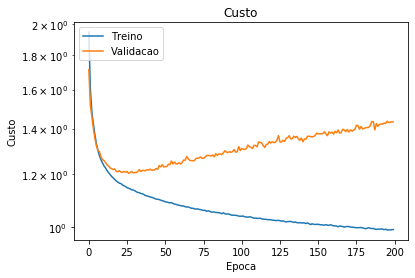

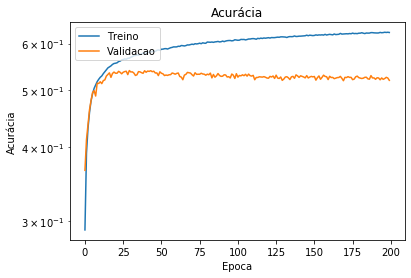

[[4.2 0.1 2.6 0.1 0.4 0.2 0.1 0.2 0.2 0.9 0. ]
 [0.  4.8 1.8 0.  0.  0.1 0.  0.  0.  0.  2.2]
 [0.1 0.2 7.9 0.1 0.1 0.2 0.  0.  0.  0.1 0.1]
 [0.2 0.1 2.6 5.4 0.1 0.1 0.3 0.1 0.  0.1 0. ]
 [0.2 0.1 2.5 0.1 5.6 0.3 0.  0.1 0.  0.2 0. ]
 [0.1 0.2 2.4 0.  0.2 5.7 0.  0.  0.  0.1 0.4]
 [0.1 0.1 1.9 0.4 0.1 0.1 6.  0.1 0.  0.1 0. ]
 [0.5 0.  1.6 0.1 0.2 0.1 0.1 2.1 4.  0.2 0. ]
 [0.4 0.  1.  0.1 0.2 0.1 0.1 2.1 5.  0.3 0. ]
 [1.6 0.1 2.7 0.1 0.4 0.2 0.  0.3 0.1 3.6 0. ]
 [0.1 2.9 2.  0.  0.1 0.3 0.  0.  0.  0.  3.7]]
[ 9.096  9.985  9.419 12.83  14.717 23.395 34.443 47.609 58.916 68.295
 74.747 78.618 78.561 80.219 78.236 80.48  79.347 79.994 78.048 79.299]
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
Acurácia maxima de validação:
0.5399242449890483


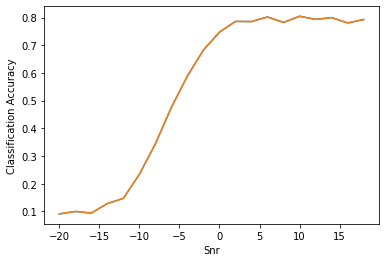

In [ ]:
#Teste 5, CNN com max pooling sem dropout acc 53,99,XX%
epocas=200
clear_session()
rede_neural = Sequential()
rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
rede_neural.add(Convolution2D(64, (1,3),strides=1, padding='same', activation="relu"))
rede_neural.add(MaxPooling2D(pool_size=(1, 3)))
# rede_neural.add(Dropout(0.5))
rede_neural.add(Convolution2D(16, (2,3), strides=1, padding='same', activation="relu"))
rede_neural.add(MaxPooling2D(pool_size=(2, 3)))
# rede_neural.add(Dropout(0.5))
rede_neural.add(Flatten())
rede_neural.add(Dense(128, activation='relu'))
# rede_neural.add(Dropout(0.5))
rede_neural.add(Dense( 11, activation='softmax' ))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('/gdrive/My Drive/teste5.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('/gdrive/My Drive/teste5.h5')

with open('/gdrive/My Drive/teste5.pkl', 'wb') as file_pi:
    pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)

#Prevendo os dados de teste com a rede
y_test_mod_p=rede_neural.predict(x_test)

#Convertendo as classificações para números
y_test_mod_ln=to_number(y_test_mod)
y_test_mod_p_ln=to_number(y_test_mod_p)


# Matrix de confusão
print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
# relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln)
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 128, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 42, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 42, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 42, 16)         6160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 14, 16)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 14, 16)        

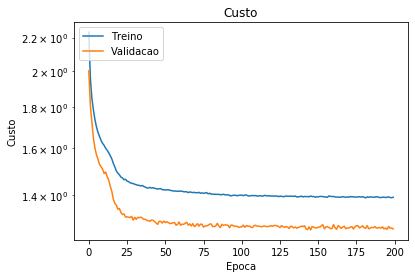

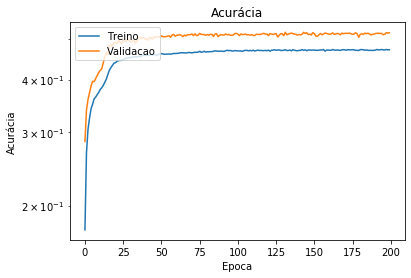

[[4.5 0.  3.4 0.  0.5 0.  0.  0.2 0.  0.3 0. ]
 [0.  5.8 2.6 0.  0.  0.1 0.  0.  0.  0.  0.6]
 [0.  0.  8.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.  3.4 5.2 0.1 0.  0.2 0.  0.  0.  0. ]
 [0.1 0.  3.3 0.  5.5 0.1 0.  0.  0.  0.  0. ]
 [0.  0.1 3.2 0.  0.2 5.4 0.  0.  0.  0.  0.2]
 [0.1 0.  2.6 0.5 0.1 0.  5.8 0.  0.  0.  0. ]
 [0.6 0.  2.3 0.  0.2 0.  0.  3.5 2.2 0.  0. ]
 [0.6 0.  1.7 0.  0.3 0.  0.  3.2 3.5 0.  0. ]
 [2.7 0.  3.5 0.  0.5 0.  0.  0.2 0.  2.2 0. ]
 [0.  4.3 2.7 0.  0.  0.6 0.  0.  0.  0.  1.5]]
[ 8.494  9.589  9.172 10.497 10.39  13.951 24.175 44.593 60.107 67.673
 75.342 75.949 76.988 78.086 77.963 78.879 78.554 76.932 77.207 79.089]
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
Acurácia maxima de validação:
0.5188181847333908
[[4.5 0.  3.4 0.  0.5 0.  0.  0.2 0.  0.3 0. ]
 [0.  5.8 2.6 0.  0.  0.1 0.  0.  0.  0.  0.6]
 [0.  0.  8.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.  3.4 5.2 0.1 0.  0.2 0.  0.  0.  0. ]
 [0.1 0.  3.3 0.  5.

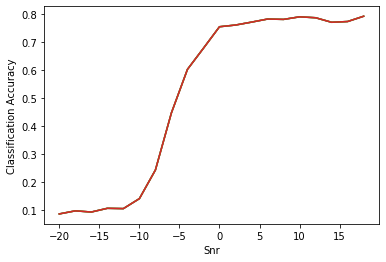

In [ ]:
##Teste 6, CNN com max pooling com dropout acc 51,88?
epocas=200
clear_session()
rede_neural = Sequential()
rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
rede_neural.add(Convolution2D(64, (1,3),strides=1, padding='same', activation="relu"))
rede_neural.add(MaxPooling2D(pool_size=(1, 3)))
rede_neural.add(Dropout(0.5))
rede_neural.add(Convolution2D(16, (2,3), strides=1, padding='same', activation="relu"))
rede_neural.add(MaxPooling2D(pool_size=(2, 3)))
rede_neural.add(Dropout(0.5))
rede_neural.add(Flatten())
rede_neural.add(Dense(128, activation='relu'))
rede_neural.add(Dropout(0.5))
rede_neural.add(Dense( 11, activation='softmax' ))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('/gdrive/My Drive/teste5.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('/gdrive/My Drive/teste5.h5')

with open('/gdrive/My Drive/teste5.pkl', 'wb') as file_pi:
    pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)

#Prevendo os dados de teste com a rede
y_test_mod_p=rede_neural.predict(x_test)

#Convertendo as classificações para números
y_test_mod_ln=to_number(y_test_mod)
y_test_mod_p_ln=to_number(y_test_mod_p)


# Matrix de confusão
print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
# relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln)
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 128, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 42, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 42, 16)         6160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1344)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               172160    
_________________________________________________________________
dense_2 (Dense)              (None, 11)               

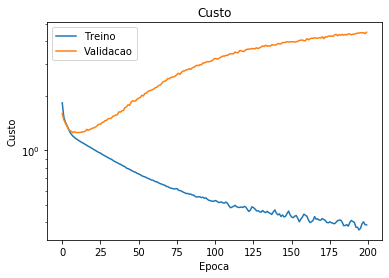

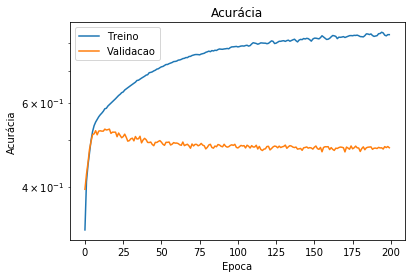

[[3.7 0.2 2.2 0.2 0.2 0.2 0.2 0.3 0.4 1.4 0.1]
 [0.  6.5 1.5 0.1 0.  0.2 0.1 0.  0.  0.1 0.6]
 [0.1 0.3 7.  0.3 0.1 0.3 0.2 0.  0.  0.3 0.3]
 [0.1 0.1 2.2 5.5 0.1 0.1 0.6 0.  0.  0.2 0.1]
 [0.2 0.1 2.1 0.2 5.3 0.4 0.1 0.1 0.1 0.4 0.1]
 [0.  0.2 2.1 0.1 0.1 5.8 0.1 0.  0.  0.2 0.5]
 [0.1 0.1 1.6 0.6 0.1 0.1 6.1 0.  0.  0.2 0.1]
 [0.4 0.1 1.4 0.1 0.1 0.1 0.1 1.8 4.1 0.5 0.1]
 [0.4 0.1 0.9 0.2 0.1 0.2 0.2 2.  4.9 0.5 0. ]
 [1.3 0.2 2.3 0.2 0.2 0.2 0.2 0.2 0.2 4.1 0.1]
 [0.  4.7 1.6 0.1 0.  0.4 0.1 0.  0.  0.1 2.1]]
[ 9.398 10.35   9.944 13.29  16.88  23.642 32.747 45.903 57.785 66.992
 72.278 76.364 75.93  76.958 76.356 78.417 77.761 77.721 75.375 78.191]
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
Acurácia maxima de validação:
0.5278787906422759
[[3.7 0.2 2.2 0.2 0.2 0.2 0.2 0.3 0.4 1.4 0.1]
 [0.  6.5 1.5 0.1 0.  0.2 0.1 0.  0.  0.1 0.6]
 [0.1 0.3 7.  0.3 0.1 0.3 0.2 0.  0.  0.3 0.3]
 [0.1 0.1 2.2 5.5 0.1 0.1 0.6 0.  0.  0.2 0.1]
 [0.2 0.1 2.1 0.2 5.

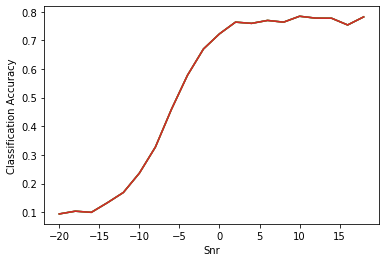

In [ ]:
#Rodar novamente
#Teste 7, CNN com max pooling  em apenas uma camada e sem dropout acc XX,XX
epocas=200
clear_session()
rede_neural = Sequential()
rede_neural.add(Reshape((2,128,1),input_shape=(2,128)))
rede_neural.add(Convolution2D(64, (1,3),strides=1, padding='same', activation="relu"))
rede_neural.add(MaxPooling2D(pool_size=(1, 3)))
# rede_neural.add(Dropout(0.5))
rede_neural.add(Convolution2D(16, (2,3), strides=1, padding='same', activation="relu"))
# rede_neural.add(MaxPooling2D(pool_size=(1, 2)))
# rede_neural.add(Dropout(0.5))
rede_neural.add(Flatten())
rede_neural.add(Dense(128, activation='relu'))
# rede_neural.add(Dropout(0.5))
rede_neural.add(Dense( 11, activation='softmax' ))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('/gdrive/My Drive/teste5.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('/gdrive/My Drive/teste5.h5')

with open('/gdrive/My Drive/teste5.pkl', 'wb') as file_pi:
    pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)

#Prevendo os dados de teste com a rede
y_test_mod_p=rede_neural.predict(x_test)

#Convertendo as classificações para números
y_test_mod_ln=to_number(y_test_mod)
y_test_mod_p_ln=to_number(y_test_mod_p)


# Matrix de confusão
print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
# relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln)
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2, 128)       0                                            
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 2, 128, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 2, 128, 64)   256         reshape_2[0][0]                  
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 2, 128, 64)   448         reshape_2[0][0]                  
____________________________________________________________________________________________

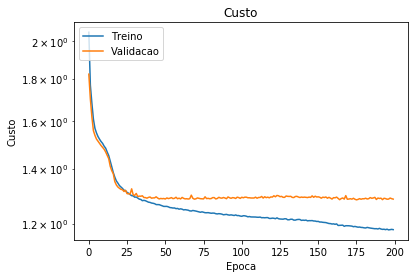

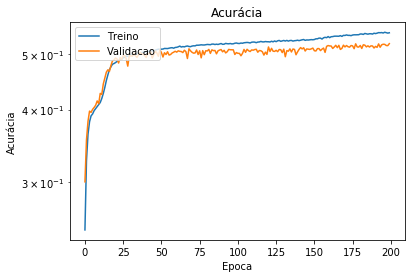

[[4.1 0.1 2.7 0.1 0.4 0.1 0.1 0.3 0.2 0.8 0.1]
 [0.  5.3 1.9 0.  0.  0.1 0.  0.  0.  0.1 1.7]
 [0.1 0.2 8.1 0.1 0.  0.1 0.  0.  0.  0.1 0.2]
 [0.2 0.1 2.8 5.2 0.1 0.1 0.4 0.1 0.  0.1 0.1]
 [0.4 0.1 2.6 0.  5.1 0.1 0.1 0.1 0.1 0.2 0.1]
 [0.1 0.2 2.5 0.  0.3 5.2 0.  0.1 0.  0.1 0.5]
 [0.1 0.1 2.  0.6 0.  0.1 5.9 0.1 0.  0.1 0.1]
 [0.6 0.  1.7 0.1 0.2 0.1 0.1 1.7 4.1 0.3 0.1]
 [0.5 0.  1.2 0.1 0.2 0.1 0.1 1.4 5.5 0.3 0.1]
 [2.1 0.1 2.8 0.1 0.4 0.1 0.1 0.3 0.2 3.  0.1]
 [0.  3.6 2.1 0.  0.  0.4 0.  0.  0.  0.  2.9]]
[ 8.946  9.893  9.419 11.848 16.697 24.074 32.285 43.649 51.623 62.256
 71.029 76.305 75.748 77.964 77.508 78.756 77.822 77.811 75.946 78.55 ]
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
Acurácia maxima de validação:
0.5206969719041478
[[4.1 0.1 2.7 0.1 0.4 0.1 0.1 0.3 0.2 0.8 0.1]
 [0.  5.3 1.9 0.  0.  0.1 0.  0.  0.  0.1 1.7]
 [0.1 0.2 8.1 0.1 0.  0.1 0.  0.  0.  0.1 0.2]
 [0.2 0.1 2.8 5.2 0.1 0.1 0.4 0.1 0.  0.1 0.1]
 [0.4 0.1 2.6 0.  5.

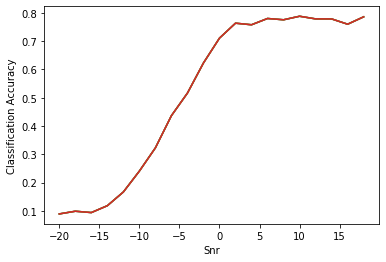

In [ ]:
#Teste 8 outro convoluçoes em paralelo
epocas = 200
inputs=Input(shape=(2,128))
layer1=Reshape((2,128,1))(inputs)

layer2_1_1=Convolution2D(64, (1,3),strides=1, padding='same', activation="relu")(layer1)
layer2_1_2=MaxPooling2D(pool_size=(1, 3))(layer2_1_1)
layer2_1_3=Flatten()(layer2_1_2)

layer2_2_1=Convolution2D(64, (1,6),strides=1, padding='same', activation="relu")(layer1)
layer2_2_2=MaxPooling2D(pool_size=(1, 6))(layer2_2_1)
layer2_2_3=Flatten()(layer2_2_2)

layer2_3_1=Convolution2D(64, (2,3),strides=1, padding='same', activation="relu")(layer1)
layer2_3_2=MaxPooling2D(pool_size=(2, 3))(layer2_3_1)
layer2_3_3=Flatten()(layer2_3_2)

layer2_4_1=Convolution2D(64, (2,6),strides=1, padding='same', activation="relu")(layer1)
layer2_4_2=MaxPooling2D(pool_size=(2, 6))(layer2_4_1)
layer2_4_3=Flatten()(layer2_4_2)

layer2=Concatenate()([layer2_1_3,layer2_2_3,layer2_3_3,layer2_4_3])
layer4=Dropout(0.5)(layer2)
layer5=Dense(128, activation='relu')(layer4)
outputs=Dense(11, activation='softmax')(layer5)
rede_neural=Model(inputs, outputs)
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()
plot_model(rede_neural,show_shapes=True, show_layer_names=False)

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('/gdrive/My Drive/teste5.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('/gdrive/My Drive/teste5.h5')

with open('/gdrive/My Drive/teste5.pkl', 'wb') as file_pi:
    pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)

#Prevendo os dados de teste com a rede
y_test_mod_p=rede_neural.predict(x_test)

#Convertendo as classificações para números
y_test_mod_ln=to_number(y_test_mod)
y_test_mod_p_ln=to_number(y_test_mod_p)


# Matrix de confusão
print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
# relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln)
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 2, 128)       0                                            
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 2, 128, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 2, 128, 64)   256         reshape_3[0][0]                  
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 2, 128, 64)   448         reshape_3[0][0]                  
____________________________________________________________________________________________

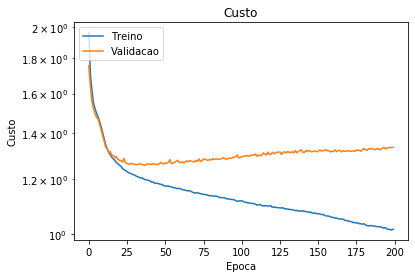

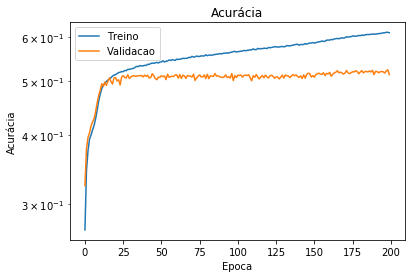

[[4.1 0.1 2.4 0.1 0.4 0.2 0.1 0.3 0.4 1.  0. ]
 [0.1 5.6 1.8 0.1 0.1 0.1 0.  0.  0.  0.1 1.3]
 [0.2 0.2 7.3 0.2 0.3 0.2 0.1 0.  0.1 0.2 0.1]
 [0.2 0.1 2.4 5.2 0.2 0.1 0.5 0.  0.1 0.2 0.1]
 [0.4 0.1 2.3 0.1 5.2 0.3 0.1 0.1 0.3 0.3 0.1]
 [0.1 0.2 2.2 0.1 0.4 5.4 0.1 0.1 0.1 0.1 0.3]
 [0.1 0.  1.7 0.5 0.2 0.1 6.  0.  0.1 0.1 0. ]
 [0.6 0.  1.5 0.1 0.2 0.1 0.1 2.  3.9 0.4 0. ]
 [0.4 0.1 1.  0.1 0.2 0.1 0.1 1.9 5.1 0.4 0. ]
 [1.5 0.1 2.5 0.1 0.4 0.2 0.1 0.2 0.3 3.7 0.1]
 [0.1 3.6 1.9 0.1 0.1 0.3 0.1 0.  0.  0.1 2.9]]
[ 8.916  9.833  9.543 13.659 15.356 22.006 31.483 42.37  50.521 61.368
 71.148 77.076 77.744 78.848 77.721 79.957 79.988 79.842 77.808 80.018]
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
Acurácia maxima de validação:
0.5242424223459128
[[4.1 0.1 2.4 0.1 0.4 0.2 0.1 0.3 0.4 1.  0. ]
 [0.1 5.6 1.8 0.1 0.1 0.1 0.  0.  0.  0.1 1.3]
 [0.2 0.2 7.3 0.2 0.3 0.2 0.1 0.  0.1 0.2 0.1]
 [0.2 0.1 2.4 5.2 0.2 0.1 0.5 0.  0.1 0.2 0.1]
 [0.4 0.1 2.3 0.1 5.

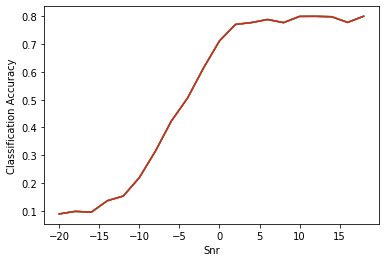

In [ ]:
#Teste 9 convolucoes em paralelo e bloco denso
epocas = 200
inputs=Input(shape=(2,128))
layer1=Reshape((2,128,1))(inputs)

layer2_1_1=Convolution2D(64, (1,3),strides=1, padding='same', activation="relu")(layer1)
layer2_1_2=MaxPooling2D(pool_size=(1, 3))(layer2_1_1)
layer2_1_3=Flatten()(layer2_1_2)

layer2_2_1=Convolution2D(64, (1,6),strides=1, padding='same', activation="relu")(layer1)
layer2_2_2=MaxPooling2D(pool_size=(1, 6))(layer2_2_1)
layer2_2_3=Flatten()(layer2_2_2)

layer2_3_1=Convolution2D(64, (2,3),strides=1, padding='same', activation="relu")(layer1)
layer2_3_2=MaxPooling2D(pool_size=(2, 3))(layer2_3_1)
layer2_3_3=Flatten()(layer2_3_2)

layer2_4_1=Convolution2D(64, (2,6),strides=1, padding='same', activation="relu")(layer1)
layer2_4_2=MaxPooling2D(pool_size=(2, 6))(layer2_4_1)
layer2_4_3=Flatten()(layer2_4_2)

layer2_5_1=Flatten()(layer1)
layer2_5_2=Dense(64, activation='relu')(layer2_5_1)

layer2=Concatenate()([layer2_1_3,layer2_2_3,layer2_3_3,layer2_4_3,layer2_5_2])
layer4=Dropout(0.5)(layer2)
layer5=Dense(128, activation='relu')(layer4)
outputs=Dense(11, activation='softmax')(layer5)
rede_neural=Model(inputs, outputs)
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()
plot_model(rede_neural,show_shapes=True, show_layer_names=False)

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('/gdrive/My Drive/teste5.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('/gdrive/My Drive/teste5.h5')

with open('/gdrive/My Drive/teste5.pkl', 'wb') as file_pi:
    pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)

#Prevendo os dados de teste com a rede
y_test_mod_p=rede_neural.predict(x_test)

#Convertendo as classificações para números
y_test_mod_ln=to_number(y_test_mod)
y_test_mod_p_ln=to_number(y_test_mod_p)


# Matrix de confusão
print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
# relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln)
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)


In [ ]:
#Teste NENHUM SO BRINCANDO
epocas = 200
inputs=Input(shape=(2,128))
layer1=Reshape((2,128,1))(inputs)

layer2_1_1=Convolution2D(64, (1,3),strides=1, padding='same', activation="relu")(layer1)
layer2_1_2=MaxPooling2D(pool_size=(1, 3))(layer2_1_1)
layer2_1_3=Flatten()(layer2_1_2)

layer2_2_1=Convolution2D(64, (1,6),strides=1, padding='same', activation="relu")(layer1)
layer2_2_2=MaxPooling2D(pool_size=(1, 6))(layer2_2_1)
layer2_2_3=Flatten()(layer2_2_2)

layer2_3_1=Convolution2D(64, (2,3),strides=1, padding='same', activation="relu")(layer1)
layer2_3_2=MaxPooling2D(pool_size=(2, 3))(layer2_3_1)
layer2_3_3=Flatten()(layer2_3_2)

layer2_4_1=Convolution2D(64, (2,6),strides=1, padding='same', activation="relu")(layer1)
layer2_4_2=MaxPooling2D(pool_size=(2, 6))(layer2_4_1)
layer2_4_3=Flatten()(layer2_4_2)

layer2_5_1=Flatten()(layer1)
layer2_5_2=Dense(64, activation='relu')(layer2_5_1)

layer2=Concatenate()([layer2_1_3,layer2_2_3,layer2_3_3,layer2_4_3,layer2_5_2])
# layer4=Dropout(0.6)(layer2)
layer5=Dense(128, activation='relu')(layer2)
outputs=Dense(11, activation='softmax')(layer5)
rede_neural=Model(inputs, outputs)
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
rede_neural.summary()
plot_model(rede_neural,show_shapes=True, show_layer_names=False)

#Treinando salvando o melhor modelo
mc = ModelCheckpoint('/gdrive/My Drive/teste5.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
historico=rede_neural.fit(x_train, y_train_mod,batch_size=1000,epochs=epocas,verbose=1,validation_data=(x_test, y_test_mod), callbacks=[mc])
rede_neural=load_model('/gdrive/My Drive/teste5.h5')

with open('/gdrive/My Drive/teste5.pkl', 'wb') as file_pi:
    pickle.dump(historico.history, file_pi)

#mprimindo relatorios do treinamento
mostra_grafico_custo(historico)
mostra_grafico_accuracy(historico)

#Prevendo os dados de teste com a rede
y_test_mod_p=rede_neural.predict(x_test)

#Convertendo as classificações para números
y_test_mod_ln=to_number(y_test_mod)
y_test_mod_p_ln=to_number(y_test_mod_p)


# Matrix de confusão
print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
# relatorio_classificacao(mods,snrs,y_test_mod_ln,y_test_mod_p_ln)
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)
print("Acurácia maxima de validação:")
print(np.amax(np.array(historico.history['val_acc'] )))

print(np.round(confusion_matrix(y_test_mod_ln, y_test_mod_p_ln)*100/(y_test_mod_ln.shape),1))

#Imprimindo relatório de classificação
relatorio_classificacao2(snrs,y_test_mod_ln,y_test_mod_p_ln)


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 2, 128)       0                                            
__________________________________________________________________________________________________
reshape_6 (Reshape)             (None, 2, 128, 1)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 2, 128, 64)   256         reshape_6[0][0]                  
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 2, 128, 64)   448         reshape_6[0][0]                  
____________________________________________________________________________________________

KeyboardInterrupt: ignored

# **Navarro's implementation**

In [ ]:
#df = pd.read_csv("/gdrive/My Drive/dados.csv")
df = pd.read_csv("/gdrive/My Drive/dados2.csv")
print(df.head(10))

   SNR  CNN2 COM DROPOUT 0,6  ...  REDE PARALELA  REDE PARALELA + BLOCO DENSO
0  -20                 9.187  ...          8.946                        8.916
1  -18                 9.741  ...          9.893                        9.833
2  -16                 9.481  ...          9.419                        9.543
3  -14                12.185  ...         11.848                       13.659
4  -12                14.290  ...         16.697                       15.356
5  -10                20.772  ...         24.074                       22.006
6   -8                29.911  ...         32.285                       31.483
7   -6                43.558  ...         43.649                       42.370
8   -4                57.696  ...         51.623                       50.521
9   -2                68.532  ...         62.256                       61.368

[10 rows x 8 columns]


Text(0, 0.5, 'Accuracy (%)')

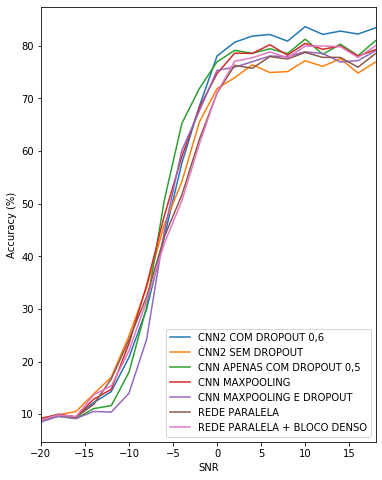

In [ ]:
plt.figure(figsize=(6,8))

ax = plt.gca()

df.plot(kind='line',x='SNR',y='CNN2 COM DROPOUT 0,6',ax=ax)
df.plot(kind='line',x='SNR',y='CNN2 SEM DROPOUT', ax=ax)
df.plot(kind='line',x='SNR',y='CNN APENAS COM DROPOUT 0,5', ax=ax)
df.plot(kind='line',x='SNR',y='CNN MAXPOOLING', ax=ax)
df.plot(kind='line',x='SNR',y='CNN MAXPOOLING E DROPOUT', ax=ax)
df.plot(kind='line',x='SNR',y='REDE PARALELA', ax=ax)
df.plot(kind='line',x='SNR',y='REDE PARALELA + BLOCO DENSO', ax=ax)
plt.ylabel('Accuracy (%)')

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#Pacotes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import load_model

import time

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

Found GPU at: /device:GPU:0


([array([200000.,  20000.]),
  array([200000.,  20000.]),
  array([200000.,  20000.]),
  array([200000.,  20000.]),
  array([200000.,  20000.]),
  array([200000.,  20000.]),
  array([200000.,  20000.]),
  array([200000.,  20000.]),
  array([200000.,  20000.]),
  array([200000.,  20000.]),
  array([200000.,  20000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.]),
  array([209000.,  11000.])],
 array([0. , 0.5, 1. ]),
 <a list of 31 Lists of Patches objects>)

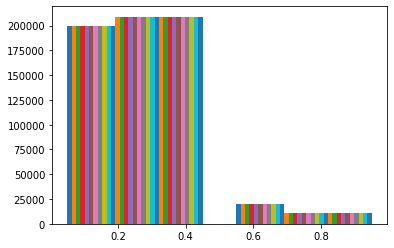

In [ ]:
# Check if classes is balanced.
plt.hist(y, bins = 2)

In [ ]:
# CV - Split train and test data
x_train, x_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=42)

#Check shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
#First, we must define the CNN model using the Keras deep learning library.
#The model requires a three-dimensional input with [samples, time steps, features].

#This is exactly how we have loaded the data, where one sample is one window of the
#time series data, each window has 128 time steps, and a time step has two (I, Q)
# variables or features.

#The output for the model will be a eleven-element vector containing the probability
#of a given window belonging to each of the eleven modulation types.

n_timesteps, n_features, n_outputs = x_train.shape[2], x_train.shape[1], y_train.shape[1]

print(n_timesteps, n_features, n_outputs)

rede_neural = Sequential()
rede_neural.add(Convolution1D(filters=64, kernel_size=2, activation='relu', padding='same', input_shape=(n_timesteps,n_features)))
#rede_neural.add(Convolution1D(filters=64, kernel_size=3, activation='relu', padding='same'))
#For ovefitting, use dropout
#rede_neural.add(Dropout(0.5)) 
rede_neural.add(Flatten())
rede_neural.add(Dense(100, activation='relu'))
#Não usar sigmoid -> NaN a função de custo. Por que?
rede_neural.add(Dense(n_outputs, activation='softmax'))
rede_neural.compile(loss='categorical_crossentropy', optimizer='Adam',  metrics=['accuracy'])
print(rede_neural.summary())
print(x_train.shape, x_test.shape)
print(np.transpose(x_train, (0, 2, 1)).shape)
history = rede_neural.fit(np.transpose(x_train, (0, 2, 1)), y_train,
                          validation_data=(np.transpose(x_test, (0, 2, 1)), y_test),
                          batch_size=n_timesteps, epochs=20, verbose=1)

In [ ]:
# Show loss curves 
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()



In [ ]:
ye_test = rede_neural.predict(np.transpose(x_test, (0, 2, 1)), batch_size=100, verbose=1)
np.max(ye_test, axis=1)

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# Plot confusion matrix
test_Y_hat = rede_neural.predict(np.transpose(x_test, (0, 2, 1)), batch_size=100)
print()
conf = np.zeros([n_outputs,n_outputs])
confnorm = np.zeros([n_outputs,n_outputs])
for i in range(0,np.transpose(x_test, (0, 2, 1)).shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,n_outputs):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=mods)